In [0]:
import os
import glob
import string
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from zipfile import ZipFile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split

In [2]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-05-13 11:38:01--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  16.5MB/s    in 16s     

2020-05-13 11:38:17 (19.5 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [0]:
zip_ref = ZipFile("/tmp/rockpaperscissors.zip", 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors'

paper_dir = str(os.path.join(base_dir, 'paper'))
rock_dir = str(os.path.join(base_dir, 'rock'))
scissors_dir = str(os.path.join(base_dir, 'scissors'))


In [0]:
data_paper = os.listdir(paper_dir)
data_rock = os.listdir(rock_dir)
data_scissors = os.listdir(scissors_dir)

In [5]:
print("data paper : ",len(data_paper))
print("data rock : ",len(data_rock))
print("data scissors : ",len(data_scissors))

data paper :  712
data rock :  726
data scissors :  750


In [0]:
train_data_generator = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_data_generator = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [0]:
paper_image = []
paper_label = []
rock_image = []
rock_label = []
scissors_image = []
scissors_label = []

training_data =[]
validation_data = []
training_label =[]
validation_label = []

for i in data_paper:
    image=os.path.join(paper_dir, i)
    paper_label.append("paper")
    paper_image.append(image)
train_x,val_x,train_y,val_y = train_test_split(paper_image,paper_label,test_size=0.3)

training_data.extend(train_x)
validation_data.extend(val_x)
training_label.extend(train_y)
validation_label.extend(val_y)

for i in data_rock:
    image=os.path.join(rock_dir, i)
    rock_label.append("rock")
    rock_image.append(image)
train_x,val_x,train_y,val_y = train_test_split(rock_image,rock_label,test_size=0.3)

training_data.extend(train_x)
validation_data.extend(val_x)
training_label.extend(train_y)
validation_label.extend(val_y)

for i in data_scissors:
    image=os.path.join(scissors_dir, i)
    scissors_label.append("scissors")
    scissors_image.append(image)
train_x,val_x,train_y,val_y = train_test_split(scissors_image,scissors_label,test_size=0.3)   

training_data.extend(train_x)
validation_data.extend(val_x)
training_label.extend(train_y)
validation_label.extend(val_y)
    

In [0]:
df_train = pd.DataFrame({'image':training_data,'label':training_label})
df_val = pd.DataFrame({'image':validation_data,'label':validation_label})

In [9]:
df_train

,image,label
0,/tmp/rockpaperscissors/paper/pfyaiU10n2EvAwgw.png,paper
1,/tmp/rockpaperscissors/paper/aeVtGl2LQBr831P5.png,paper
2,/tmp/rockpaperscissors/paper/Lui3J5YhKgMvk673.png,paper
3,/tmp/rockpaperscissors/paper/OMq2VJyb0KwtdwDc.png,paper
4,/tmp/rockpaperscissors/paper/v6wOWeRyh3Sv5BXo.png,paper
...,...,...
1526,/tmp/rockpaperscissors/scissors/ErsQcWAahNPYPZ...,scissors
1527,/tmp/rockpaperscissors/scissors/vk4PY18fJkMJvt...,scissors
1528,/tmp/rockpaperscissors/scissors/T8GWcDJlUuzt12...,scissors
1529,/tmp/rockpaperscissors/scissors/3kVoftgTNdDcvP...,scissors


In [10]:
df_val

,image,label
0,/tmp/rockpaperscissors/paper/zru6yFR3dqc3SymW.png,paper
1,/tmp/rockpaperscissors/paper/mUqkjFi6NBsHR7tf.png,paper
2,/tmp/rockpaperscissors/paper/27XFtQjjXQ8AP8Tl.png,paper
3,/tmp/rockpaperscissors/paper/4Bimc2E5E9jTh1Fh.png,paper
4,/tmp/rockpaperscissors/paper/wBuXrsjeqMn4ZXdn.png,paper
...,...,...
652,/tmp/rockpaperscissors/scissors/bmlw6acW9500qa...,scissors
653,/tmp/rockpaperscissors/scissors/Hkq2KHtnKxyBLL...,scissors
654,/tmp/rockpaperscissors/scissors/TJUiCdN9LUl2xP...,scissors
655,/tmp/rockpaperscissors/scissors/LFzPbXpksRrG9j...,scissors


In [11]:
train_generator = train_data_generator.flow_from_dataframe(dataframe=df_train,
                                                            x_col='image',
                                                            y_col='label',
                                                            target_size=(150,150),
                                                            batch_size=14,
                                                            class_mode='categorical')
val_generator = test_data_generator.flow_from_dataframe(dataframe=df_val,
                                                            x_col='image',
                                                            y_col='label',
                                                            target_size=(150,150),
                                                            batch_size=7,
                                                            class_mode='categorical')

Found 1531 validated image filenames belonging to 3 classes.
Found 657 validated image filenames belonging to 3 classes.


In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [14]:
model.fit(
      train_generator,
      steps_per_epoch=25, 
      epochs=20,
      validation_data=val_generator, 
      validation_steps=7,  
      verbose=2)

Epoch 1/30
25/25 - 17s - loss: 1.1182 - accuracy: 0.3457 - val_loss: 1.0976 - val_accuracy: 0.3878
Epoch 2/30
25/25 - 17s - loss: 1.0898 - accuracy: 0.4200 - val_loss: 1.0147 - val_accuracy: 0.8367
Epoch 3/30
25/25 - 17s - loss: 0.8681 - accuracy: 0.6543 - val_loss: 0.6291 - val_accuracy: 0.7143
Epoch 4/30
25/25 - 17s - loss: 0.5077 - accuracy: 0.8171 - val_loss: 0.2245 - val_accuracy: 0.9592
Epoch 5/30
25/25 - 17s - loss: 0.3595 - accuracy: 0.8475 - val_loss: 0.2908 - val_accuracy: 0.8980
Epoch 6/30
25/25 - 17s - loss: 0.2669 - accuracy: 0.9143 - val_loss: 0.1431 - val_accuracy: 0.9388
Epoch 7/30
25/25 - 17s - loss: 0.3113 - accuracy: 0.8943 - val_loss: 0.4765 - val_accuracy: 0.8367
Epoch 8/30
25/25 - 17s - loss: 0.2665 - accuracy: 0.9114 - val_loss: 0.1636 - val_accuracy: 0.9592
Epoch 9/30
25/25 - 17s - loss: 0.1958 - accuracy: 0.9413 - val_loss: 0.3229 - val_accuracy: 0.8776
Epoch 10/30
25/25 - 17s - loss: 0.1881 - accuracy: 0.9429 - val_loss: 0.0800 - val_accuracy: 0.9796
Epoch 11/

In [42]:
stats = model.fit_generator(train_generator,
                            validation_data=val_generator,
                            epochs=20,
                            steps_per_epoch=25,
                            validation_steps=7)

Epoch 1/20
25/25 [==============================] - 17s 675ms/step - loss: 0.0465 - accuracy: 0.9853 - val_loss: 0.2224 - val_accuracy: 0.9388
Epoch 2/20
25/25 [==============================] - 17s 685ms/step - loss: 0.0447 - accuracy: 0.9914 - val_loss: 0.0516 - val_accuracy: 0.9792
Epoch 3/20
25/25 [==============================] - 17s 686ms/step - loss: 0.0717 - accuracy: 0.9686 - val_loss: 0.2097 - val_accuracy: 0.9592
Epoch 4/20
25/25 [==============================] - 17s 686ms/step - loss: 0.0327 - accuracy: 0.9886 - val_loss: 0.0067 - val_accuracy: 1.0000
Epoch 5/20
25/25 [==============================] - 17s 671ms/step - loss: 0.0303 - accuracy: 0.9912 - val_loss: 0.0709 - val_accuracy: 0.9592
Epoch 6/20
25/25 [==============================] - 17s 691ms/step - loss: 0.0497 - accuracy: 0.9857 - val_loss: 0.1098 - val_accuracy: 0.9796
Epoch 7/20
25/25 [==============================] - 17s 691ms/step - loss: 0.0341 - accuracy: 0.9886 - val_loss: 0.0186 - val_accuracy: 1.0000

In [47]:
stats.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [0]:
train_acc = stats.history['accuracy']
val_acc = stats.history['val_accuracy']
train_loss = stats.history['loss']
val_loss = stats.history['val_loss']

epochs = range(1,len(train_acc)+1)

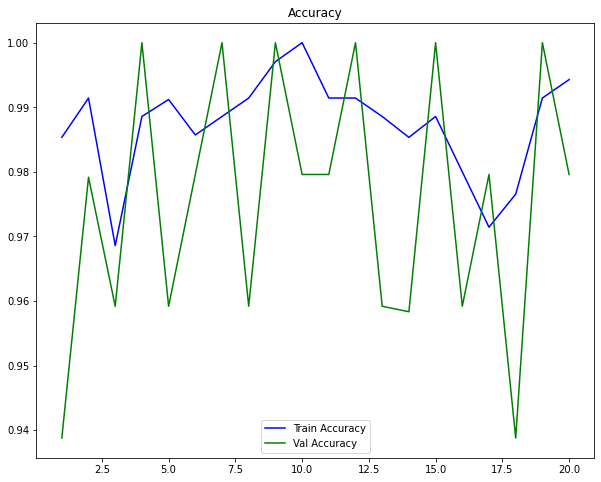

In [52]:
plt.figure(figsize=(10,8))
plt.plot(epochs , train_acc, 'b', label='Train Accuracy')
plt.plot(epochs , val_acc, 'g', label='Val Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

<Figure size 720x576 with 0 Axes>

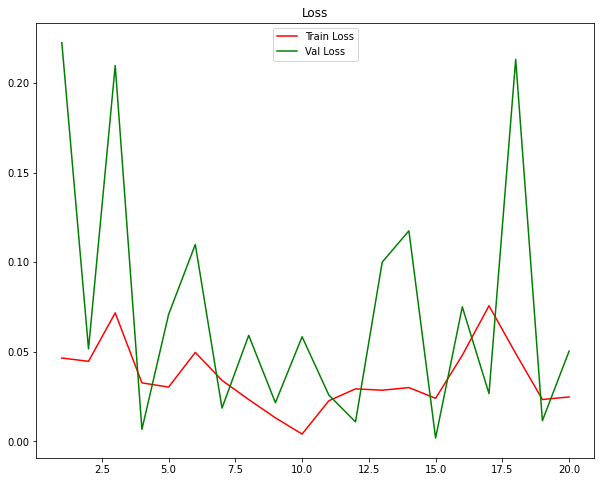

In [54]:
plt.figure(figsize=(10,8))
plt.figure(figsize=(10,8))
plt.plot(epochs , train_loss, 'r', label='Train Loss')
plt.plot(epochs , val_loss, 'g', label='Val Loss')
plt.title('Loss')
plt.legend(loc='upper center')
plt.show()

Saving 0a3UtNzl5Ll3sq8K.png to 0a3UtNzl5Ll3sq8K (1).png
0a3UtNzl5Ll3sq8K.png
[[1. 0. 0.]]
Paper


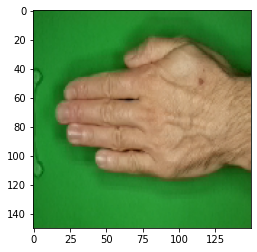

In [56]:
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  cl = str(classes)
  print(fn)
  if cl == '[[1. 0. 0.]]':
    print(classes)
    print('Paper')
  elif cl == '[[0. 1. 0.]]':
    print(classes)
    print('Rock')
  else:
    print(classes)
    print('Scissors')
  
